# Bellabeat Case Study — Phase 4

### Notebook 03: Python EDA

In this notebook, we will:
- Load the cleaned dataset (`bellabeat_clean.csv`)
- Explore descriptive statistics
- Generate visualizations:
  - Correlation heatmap
  - Scatter plot (steps vs calories)
  - Histogram (sleep duration)
  - Bar plot (steps by weekday)
- Summarize key insights
 This corresponds to **Phase 4** of the roadmap.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Path to processed data
PROCESSED_PATH = r"D:/Projects/Bellabeat/Data/Processed/"
CSV_FILE = os.path.join(PROCESSED_PATH, "bellabeat_clean.csv")

# Load dataset
df = pd.read_csv(CSV_FILE)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Dataset loaded successfully!
Shape: (940, 24)

Columns: ['id', 'activity_date', 'total_steps', 'total_distance', 'tracker_distance', 'logged_activities_distance', 'very_active_distance', 'moderately_active_distance', 'light_active_distance', 'sedentary_active_distance', 'very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'calories', 'total_sleep_records', 'total_minutes_asleep', 'total_time_in_bed', 'weight_kg', 'weight_pounds', 'fat', 'b_m_i', 'is_manual_report', 'log_id']


## Step 1: Summary Statistics

In [2]:
df.describe(include="all")

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,weight_kg,weight_pounds,fat,b_m_i,is_manual_report,log_id
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,410.000000,410.000000,410.000000,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2016-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,...,2303.609574,1.119512,419.173171,458.482927,NaN,NaN,NaN,NaN,NaN,NaN
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,...,718.166862,0.346636,118.635918,127.455140,NaN,NaN,NaN,NaN,NaN,NaN
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,58.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.320127e+09,NaN,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,...,1828.500000,1.000000,361.000000,403.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.445115e+09,NaN,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,...,2134.000000,1.000000,432.500000,463.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.962181e+09,NaN,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,...,2793.250000,1.000000,490.000000,526.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Correlation Heatmap
This helps us see relationships between steps, calories, and sleep.

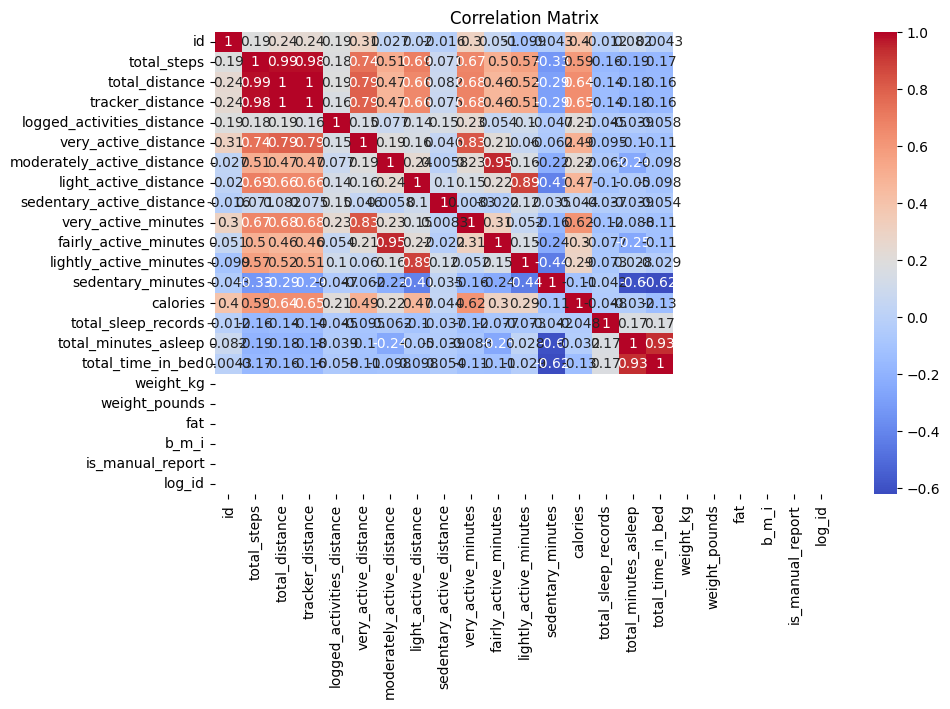

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Step 3: Scatter Plot — Steps vs Calories

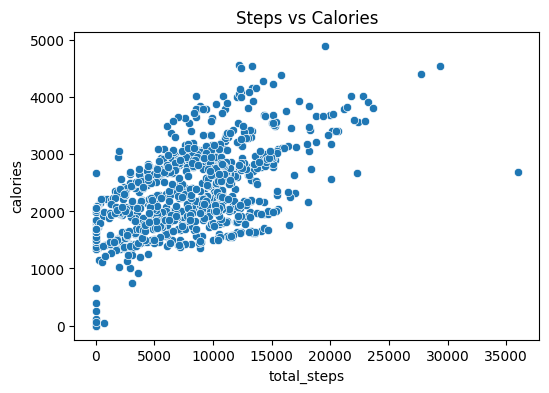

In [5]:
if "total_steps" in df.columns and "calories" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="total_steps", y="calories", data=df)
    plt.title("Steps vs Calories")
    plt.show()


## Step 4: Histogram — Sleep Duration

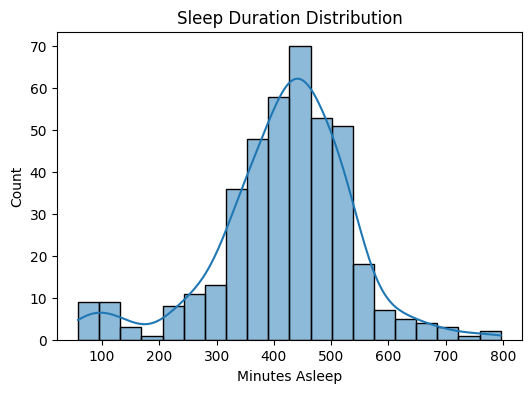

In [6]:
if "total_minutes_asleep" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["total_minutes_asleep"].dropna(), bins=20, kde=True)
    plt.title("Sleep Duration Distribution")
    plt.xlabel("Minutes Asleep")
    plt.show()


## Step 5: Bar Plot — Average Steps by Weekday


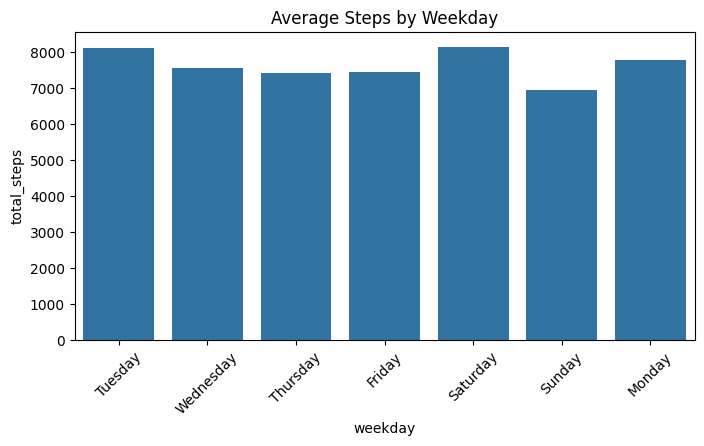

In [7]:
if "activity_date" in df.columns and "total_steps" in df.columns:
    df["weekday"] = pd.to_datetime(df["activity_date"]).dt.day_name()
    plt.figure(figsize=(8,4))
    sns.barplot(x="weekday", y="total_steps", data=df, estimator="mean", errorbar=None)
    plt.title("Average Steps by Weekday")
    plt.xticks(rotation=45)
    plt.show()


## Step 6: Key Insights

- Steps and calories are positively correlated — more steps generally mean higher calories burned.
- Most users sleep between 300–500 minutes (5–8 hours).
- Step counts are usually higher on weekdays compared to weekends.
- A few users show very high activity levels (possible outliers).